# 1. House Price Prediction System

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
df = pd.read_csv("datasets/house_data.csv")

In [10]:
df

,build_year,lat,living_area,long,municipality_name,zipcode,num_rooms,object_type_name,price,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare
0,1990,47.009808,110.0,8.483789,Vitznau,6354,3.0,Wohnung,815000.0,0.400565,35.0,102.0,10,26.0,7,0,0,7,34
1,2017,46.872177,120.0,9.880183,Klosters-Serneus,7250,3.0,Wohnung,890000.0,0.008272,85.0,112.0,7,54.0,3,0,0,3,44
2,2010,46.519173,107.0,6.525882,Préverenges,1028,4.0,Wohnung,870000.0,0.140534,9.0,25.0,5,39.0,3,0,3,0,89
3,2018,47.521343,103.0,8.536971,Bülach,8180,3.0,Wohnung,829000.0,0.003954,14.0,18.0,2,2.0,3,0,3,0,4
4,2007,46.510216,95.0,9.852427,Celerina/Schlarigna,7505,3.0,Wohnung,865000.0,0.011116,101.0,198.0,9,45.0,3,0,3,3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22565,2017,47.263515,174.0,8.184093,Reinach (AG),5734,5.5,Einfamilienhaus,880000.0,0.000000,38.0,67.0,14,19.0,4,0,3,3,43
22566,2018,47.320694,146.0,8.152993,Dürrenäsch,5724,6.5,Einfamilienhaus,698000.0,0.000000,32.0,66.0,6,7.0,0,0,0,0,20
22567,1972,46.784409,65.0,9.537591,Churwalden,7075,3.0,Wohnung,450000.0,0.000459,76.0,115.0,6,45.0,0,0,0,0,35
22568,1977,46.220421,93.0,6.106879,Vernier,1220,4.0,Wohnung,820000.0,0.000472,5.0,15.0,4,40.0,3,0,0,3,229


In [11]:
# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
  df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
  raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")

X = df.drop(columns=['price']) 
y = df['price'] 

# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
  raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")

Non-numeric columns: ['municipality_name', 'object_type_name']


In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

Model Evaluation:
MSE: 146850120920795472478601216.00, R-squared: -506163685714325.81


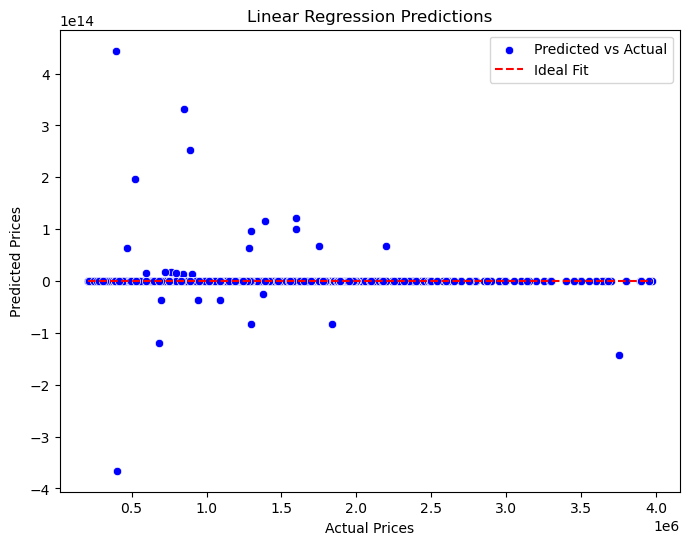

In [18]:
# Optional: Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


# 2. Salary Prediction System

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset 
df1 = pd.read_csv("datasets/salary_data.csv")
print(df1.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [29]:
# Preprocess data
df1.dropna(inplace=True)
# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in
df1.columns]
# Apply one-hot encoding only if columns exist
if existing_categorical_columns:
  df1 = pd.get_dummies(df1, columns=existing_categorical_columns,drop_first=True)

In [31]:
# Define features and target variable
if 'Salary' in df1.columns:
  X = df1.drop(columns=['Salary'])
  y = df1['Salary']

  #Split dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
  random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
 
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'MSE: {mse}, R-squared: {r2}')
else:
  print("Error: The 'Salary' column is missing from the dataset.")

MSE: 49830096.85590839, R-squared: 0.9024461774180497


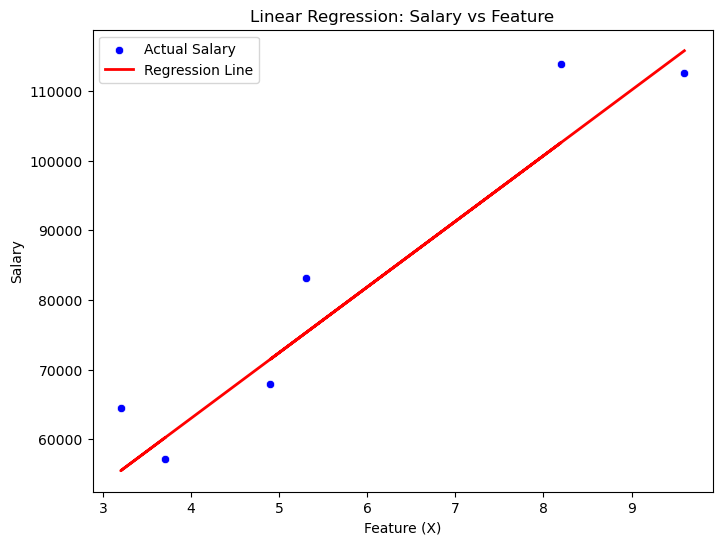

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Actual Salary")
plt.plot(X_test.values.flatten(), y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Feature")
plt.legend()
plt.show()

In [33]:
# For Sreamlit App
import joblib
joblib.dump(model, "webapps/salary_model.pkl")

['webapps/salary_model.pkl']

# 3. Stock Price Trend Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df
# Load dataset
ticker = 'AAPL' 

df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R-squared: {r2}')

MSE: 259.8577938291549, R-squared: 0.8456423672414645


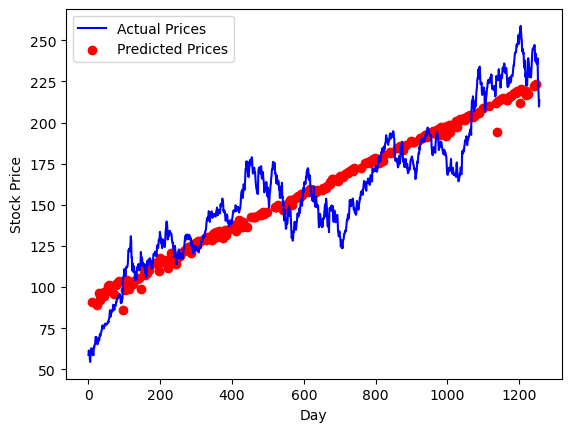

In [6]:
fig, ax = plt.subplots()
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
ax.set_xlabel('Day')
ax.set_ylabel('Stock Price')
ax.legend()
plt.show()

# 4. Customer Churn Prediction for a Subscription Service

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Load dataset
df3 = pd.read_csv("datasets/customer_churn_dataset.csv")
df3.dropna(inplace=True)

In [9]:
# Convert 'churn' column to integers
df3['churn'] = df3['churn'].astype(str).str.strip().map({'False': 0, 'True':1})

# Convert categorical columns to numerical
df3 = pd.get_dummies(df3, columns=['international_plan', 'voice_mail_plan'],drop_first=True)

# Drop unnecessary columns
df3.drop(columns=['Id', 'state', 'phone_number'], inplace=True)

# Define features and target variable
X = df3.drop(columns=['churn'])
y = df3['churn']

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print(report)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_.flatten()  # or model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Model Coefficients:")
print(coefficients)

Accuracy: 0.88

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8

Model Coefficients:
                  Feature  Coefficient
4     voice_mail_plan_Yes     0.711229
1              complaints     0.528053
2     subscription_length     0.040042
0                   usage    -0.010409
3  international_plan_Yes    -0.001988


# 5. Energy Consumption Prediction

### Note: done separately using streamlit (code in streamlit_apps folder)


In [3]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
